# WoT routing simulation results

In [103]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["font.size"] = 30
plt.rcParams["legend.numpoints"] = 1
plt.rcParams["lines.markersize"] = 10

# 1. Simulation results in unprocessed WoT graph

In [84]:
fail = np.sort(np.genfromtxt("data/stats/FAIL_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')
cont = np.sort(np.genfromtxt("data/stats/CONT_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')
evn = np.sort(np.genfromtxt("data/stats/EVN_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')
evnr = np.sort(np.genfromtxt("data/stats/EVNR_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')
d2dfs = np.sort(np.genfromtxt("data/stats/D2DFS_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')
d3dfs = np.sort(np.genfromtxt("data/stats/D3DFS_dclip.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('clip', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='clip')

## 1.1 Success rate - Hops

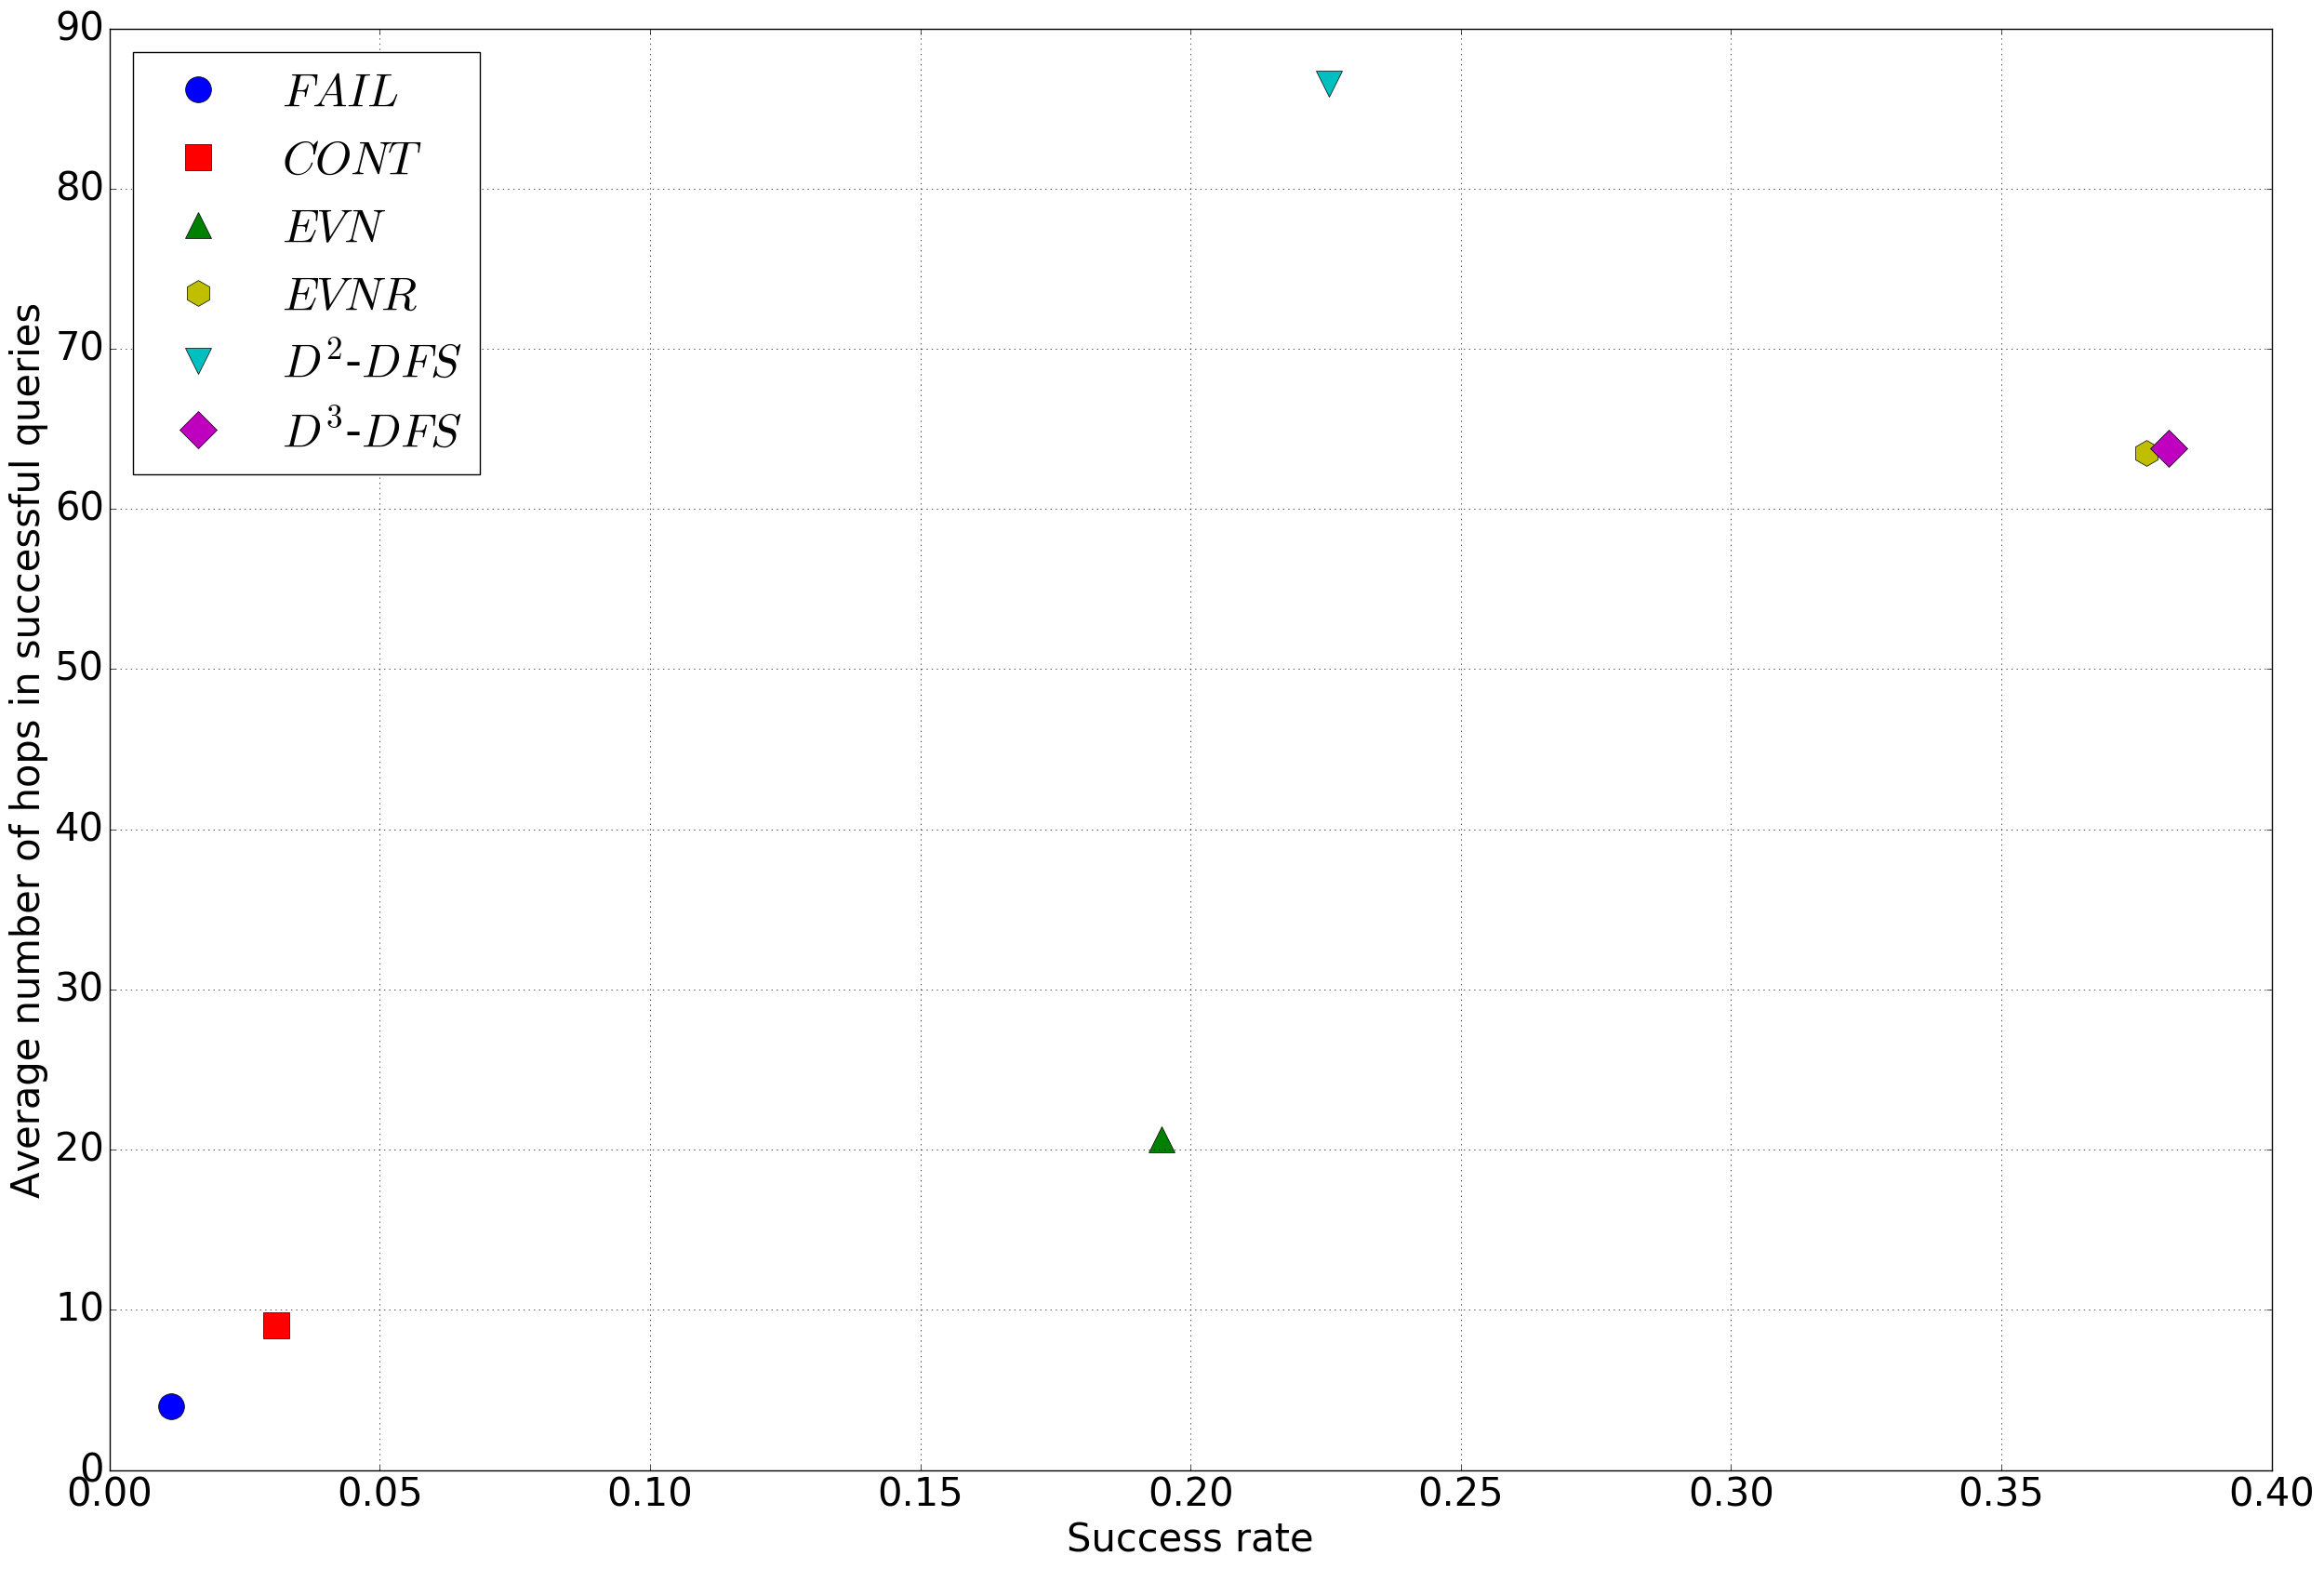

In [85]:
plt.plot(fail['succ'][-1], fail['apl'][-1], 'bo', label='$FAIL$', markersize=20)
plt.plot(cont['succ'][-1], cont['apl'][-1], 'rs', label='$CONT$', markersize=20)
plt.plot(evn['succ'][-1], evn['apl'][-1], 'g^', label='$EVN$', markersize=20)
plt.plot(evnr['succ'][-1], evnr['apl'][-1], 'yh', label='$EVNR$', markersize=20)
plt.plot(d2dfs['succ'][-1], d2dfs['apl'][-1], 'cv', label='$D^2$-$DFS$', markersize=20)
plt.plot(d3dfs['succ'][-1], d3dfs['apl'][-1], 'mD', label='$D^3$-$DFS$', markersize=20)
plt.grid(True)
plt.plot()
plt.xlabel("Success rate")
plt.ylabel("Average number of hops in successful queries")
plt.legend(loc='upper left')
plt.savefig("fig/succ_hops_full.eps")
plt.show()

## 1.2 Cumulative success rates per number of hops

In [ ]:
maxdeg = 885
evnr_hist = np.sort(np.genfromtxt("data/stats/EVNR_hist_885clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
d2dfs_hist = np.sort(np.genfromtxt("data/stats/D2DFS_hist_885clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
d3dfs_hist = np.sort(np.genfromtxt("data/stats/D3DFS_hist_885clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
histlist = [evnr_hist, d2dfs_hist, d3dfs_hist]
for h in histlist:
    pre = 0
    for i, succ in enumerate(h['succ']):
        h['succ'][i] = pre = pre + h['succ'][i]
plt.plot(evnr_hist['hop'], evnr_hist['succ'], 'yh', label='$EVNR$', markersize=7)
plt.plot(d2dfs_hist['hop'], d2dfs_hist['succ'], 'cv', label='$D^2$-$DFS$', markersize=7)
plt.plot(d3dfs_hist['hop'], d3dfs_hist['succ'], 'mD', label='$D^3$-$DFS$', markersize=7)
plt.grid(True)
plt.plot()
plt.title("$k_{max}=%d$" % maxdeg)
plt.xlabel("Number of hops")
plt.ylabel("Proportion of completed queries")
plt.ylim(0,1.0)
plt.legend(loc='upper left')
plt.savefig("fig/cml_full.eps")
plt.show()

# 2. Simulation results in WoT graph with bounded maximum degree

## 2.1 Success rate by maximum degree

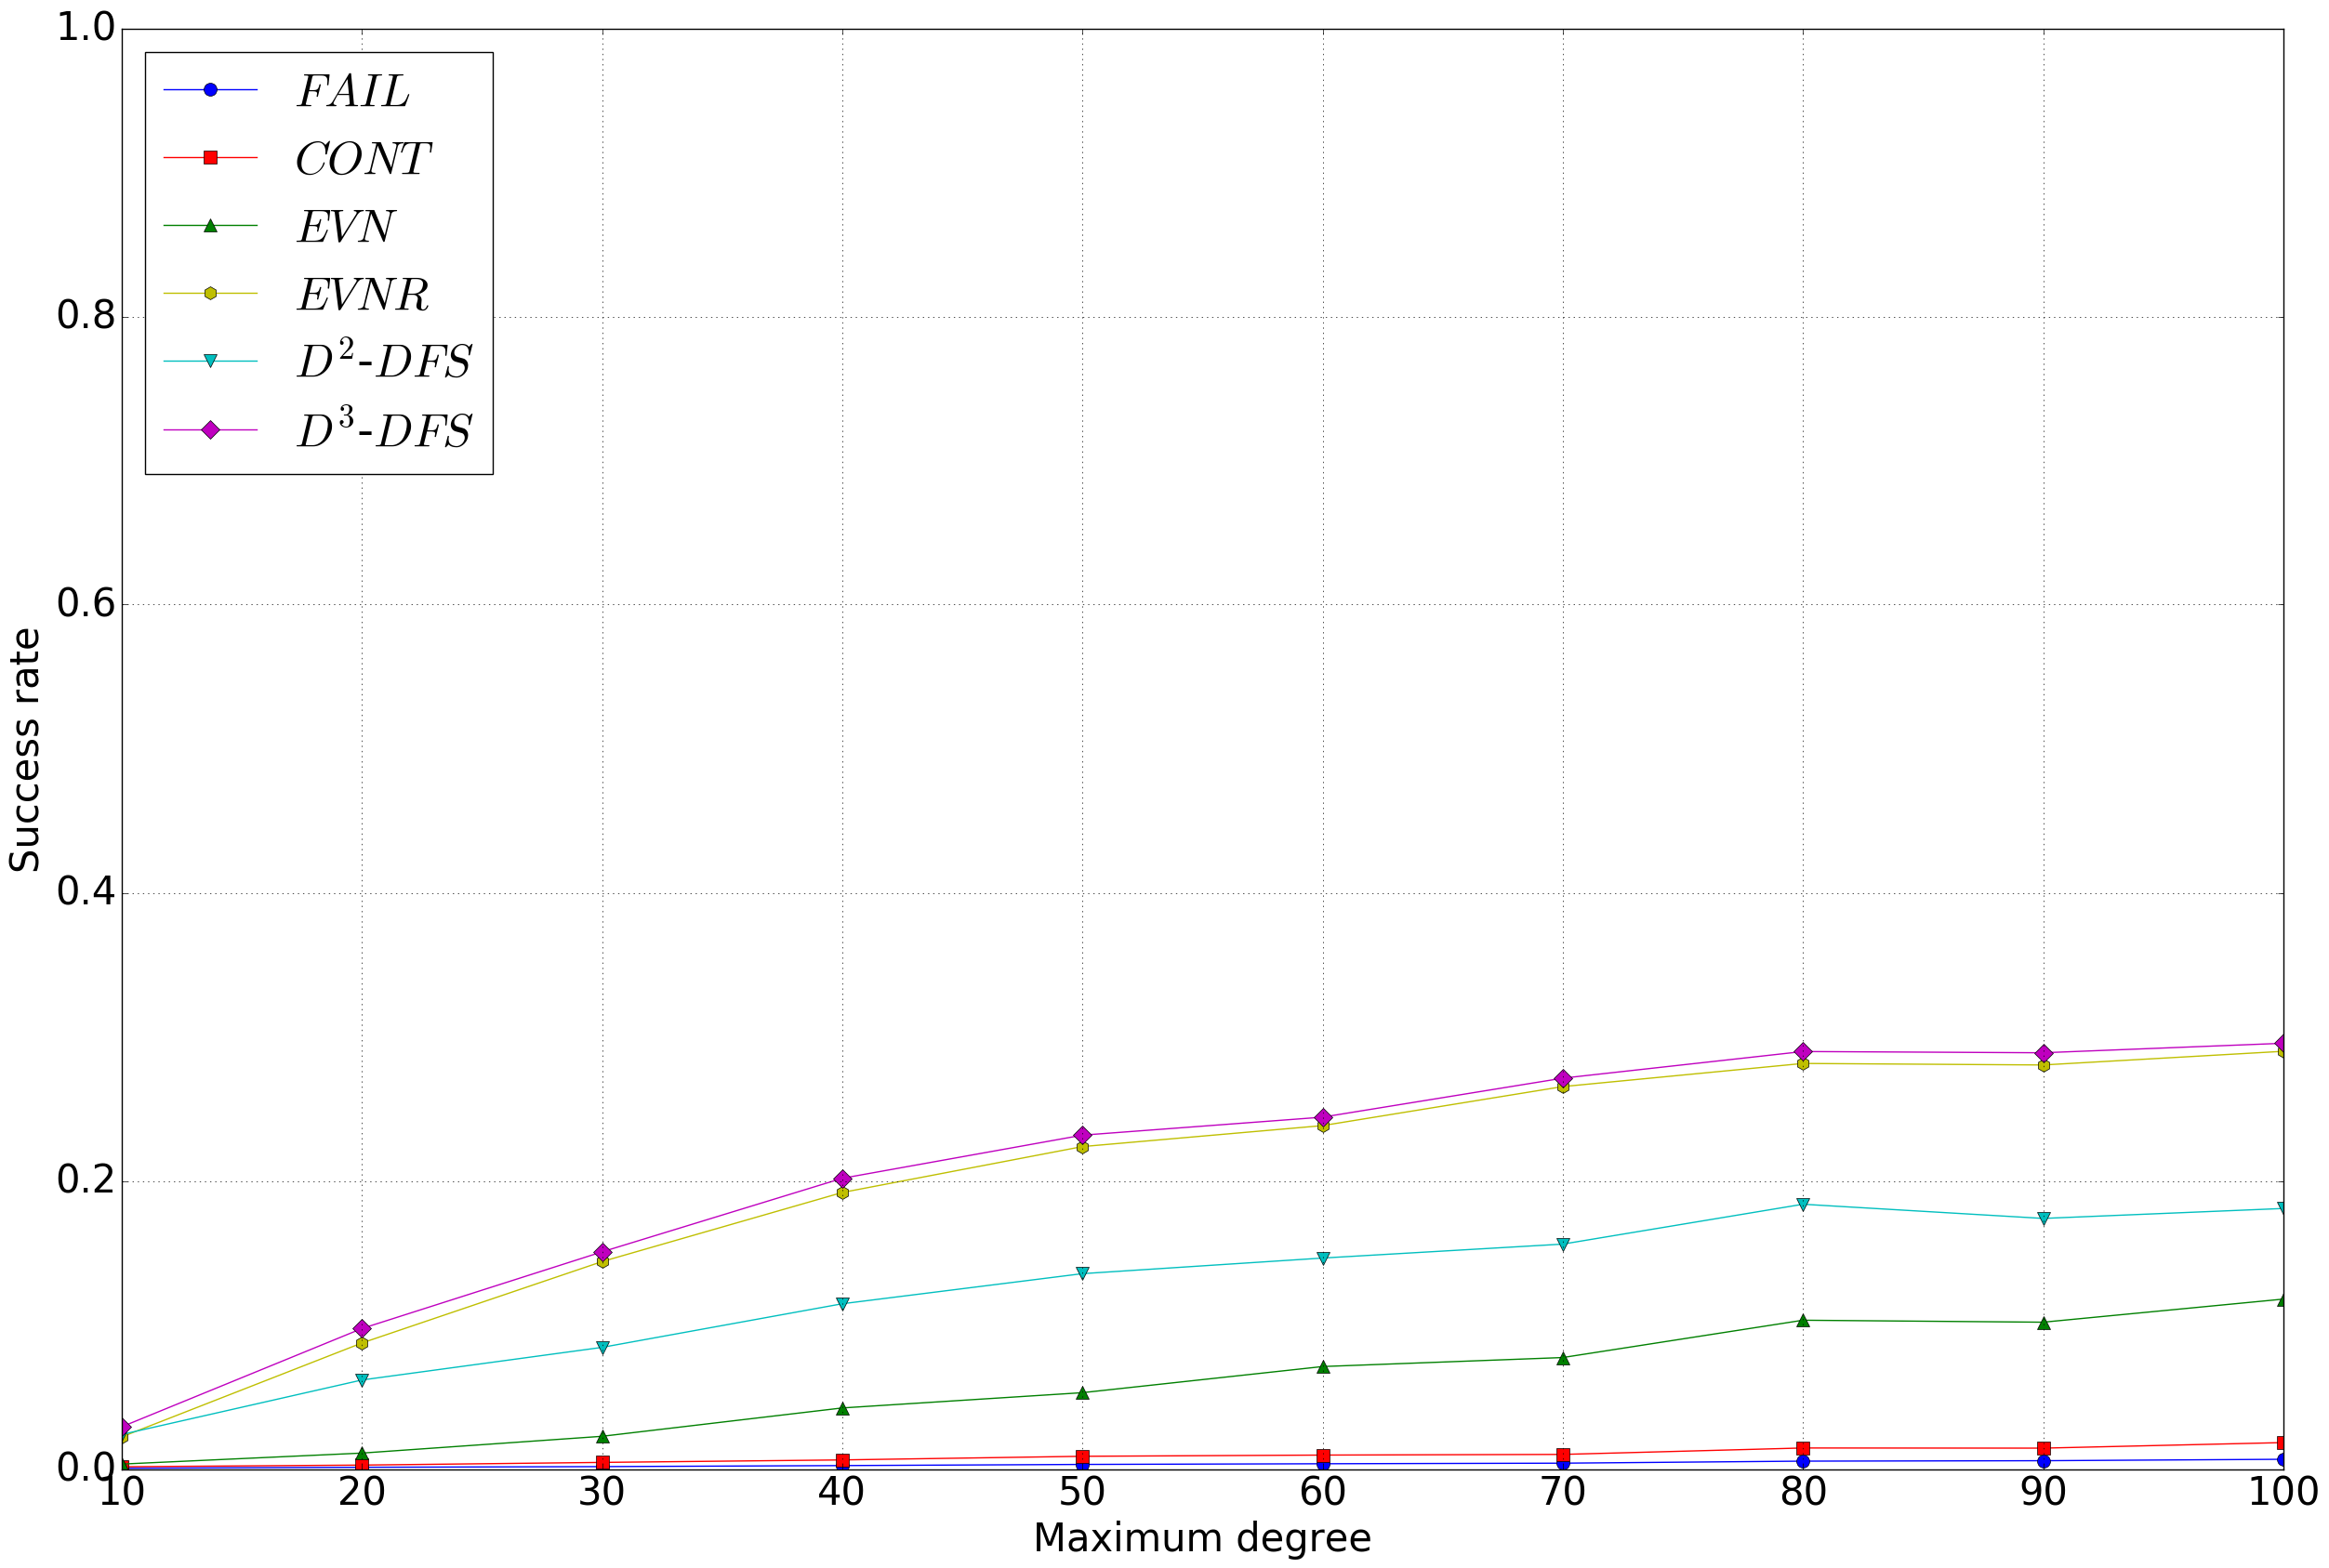

In [86]:
plt.plot(fail['clip'][:-1], fail['succ'][:-1], 'bo-', label='$FAIL$')
plt.plot(cont['clip'][:-1], cont['succ'][:-1], 'rs-', label='$CONT$')
plt.plot(evn['clip'][:-1], evn['succ'][:-1], 'g^-', label='$EVN$')
plt.plot(evnr['clip'][:-1], evnr['succ'][:-1], 'yh-', label='$EVNR$')
plt.plot(d2dfs['clip'][:-1], d2dfs['succ'][:-1], 'cv-', label='$D^2$-$DFS$')
plt.plot(d3dfs['clip'][:-1], d3dfs['succ'][:-1], 'mD-', label='$D^3$-$DFS$')
plt.grid(True)
plt.plot()
#plt.title("Success rates of routing algorithms")
plt.xlabel("Maximum degree")
plt.ylabel("Success rate")
plt.ylim(0,1)
plt.legend(loc='upper left')
plt.savefig("fig/clip_succ.eps")
plt.show()

## 2.2 Average number of hops by maximum degree

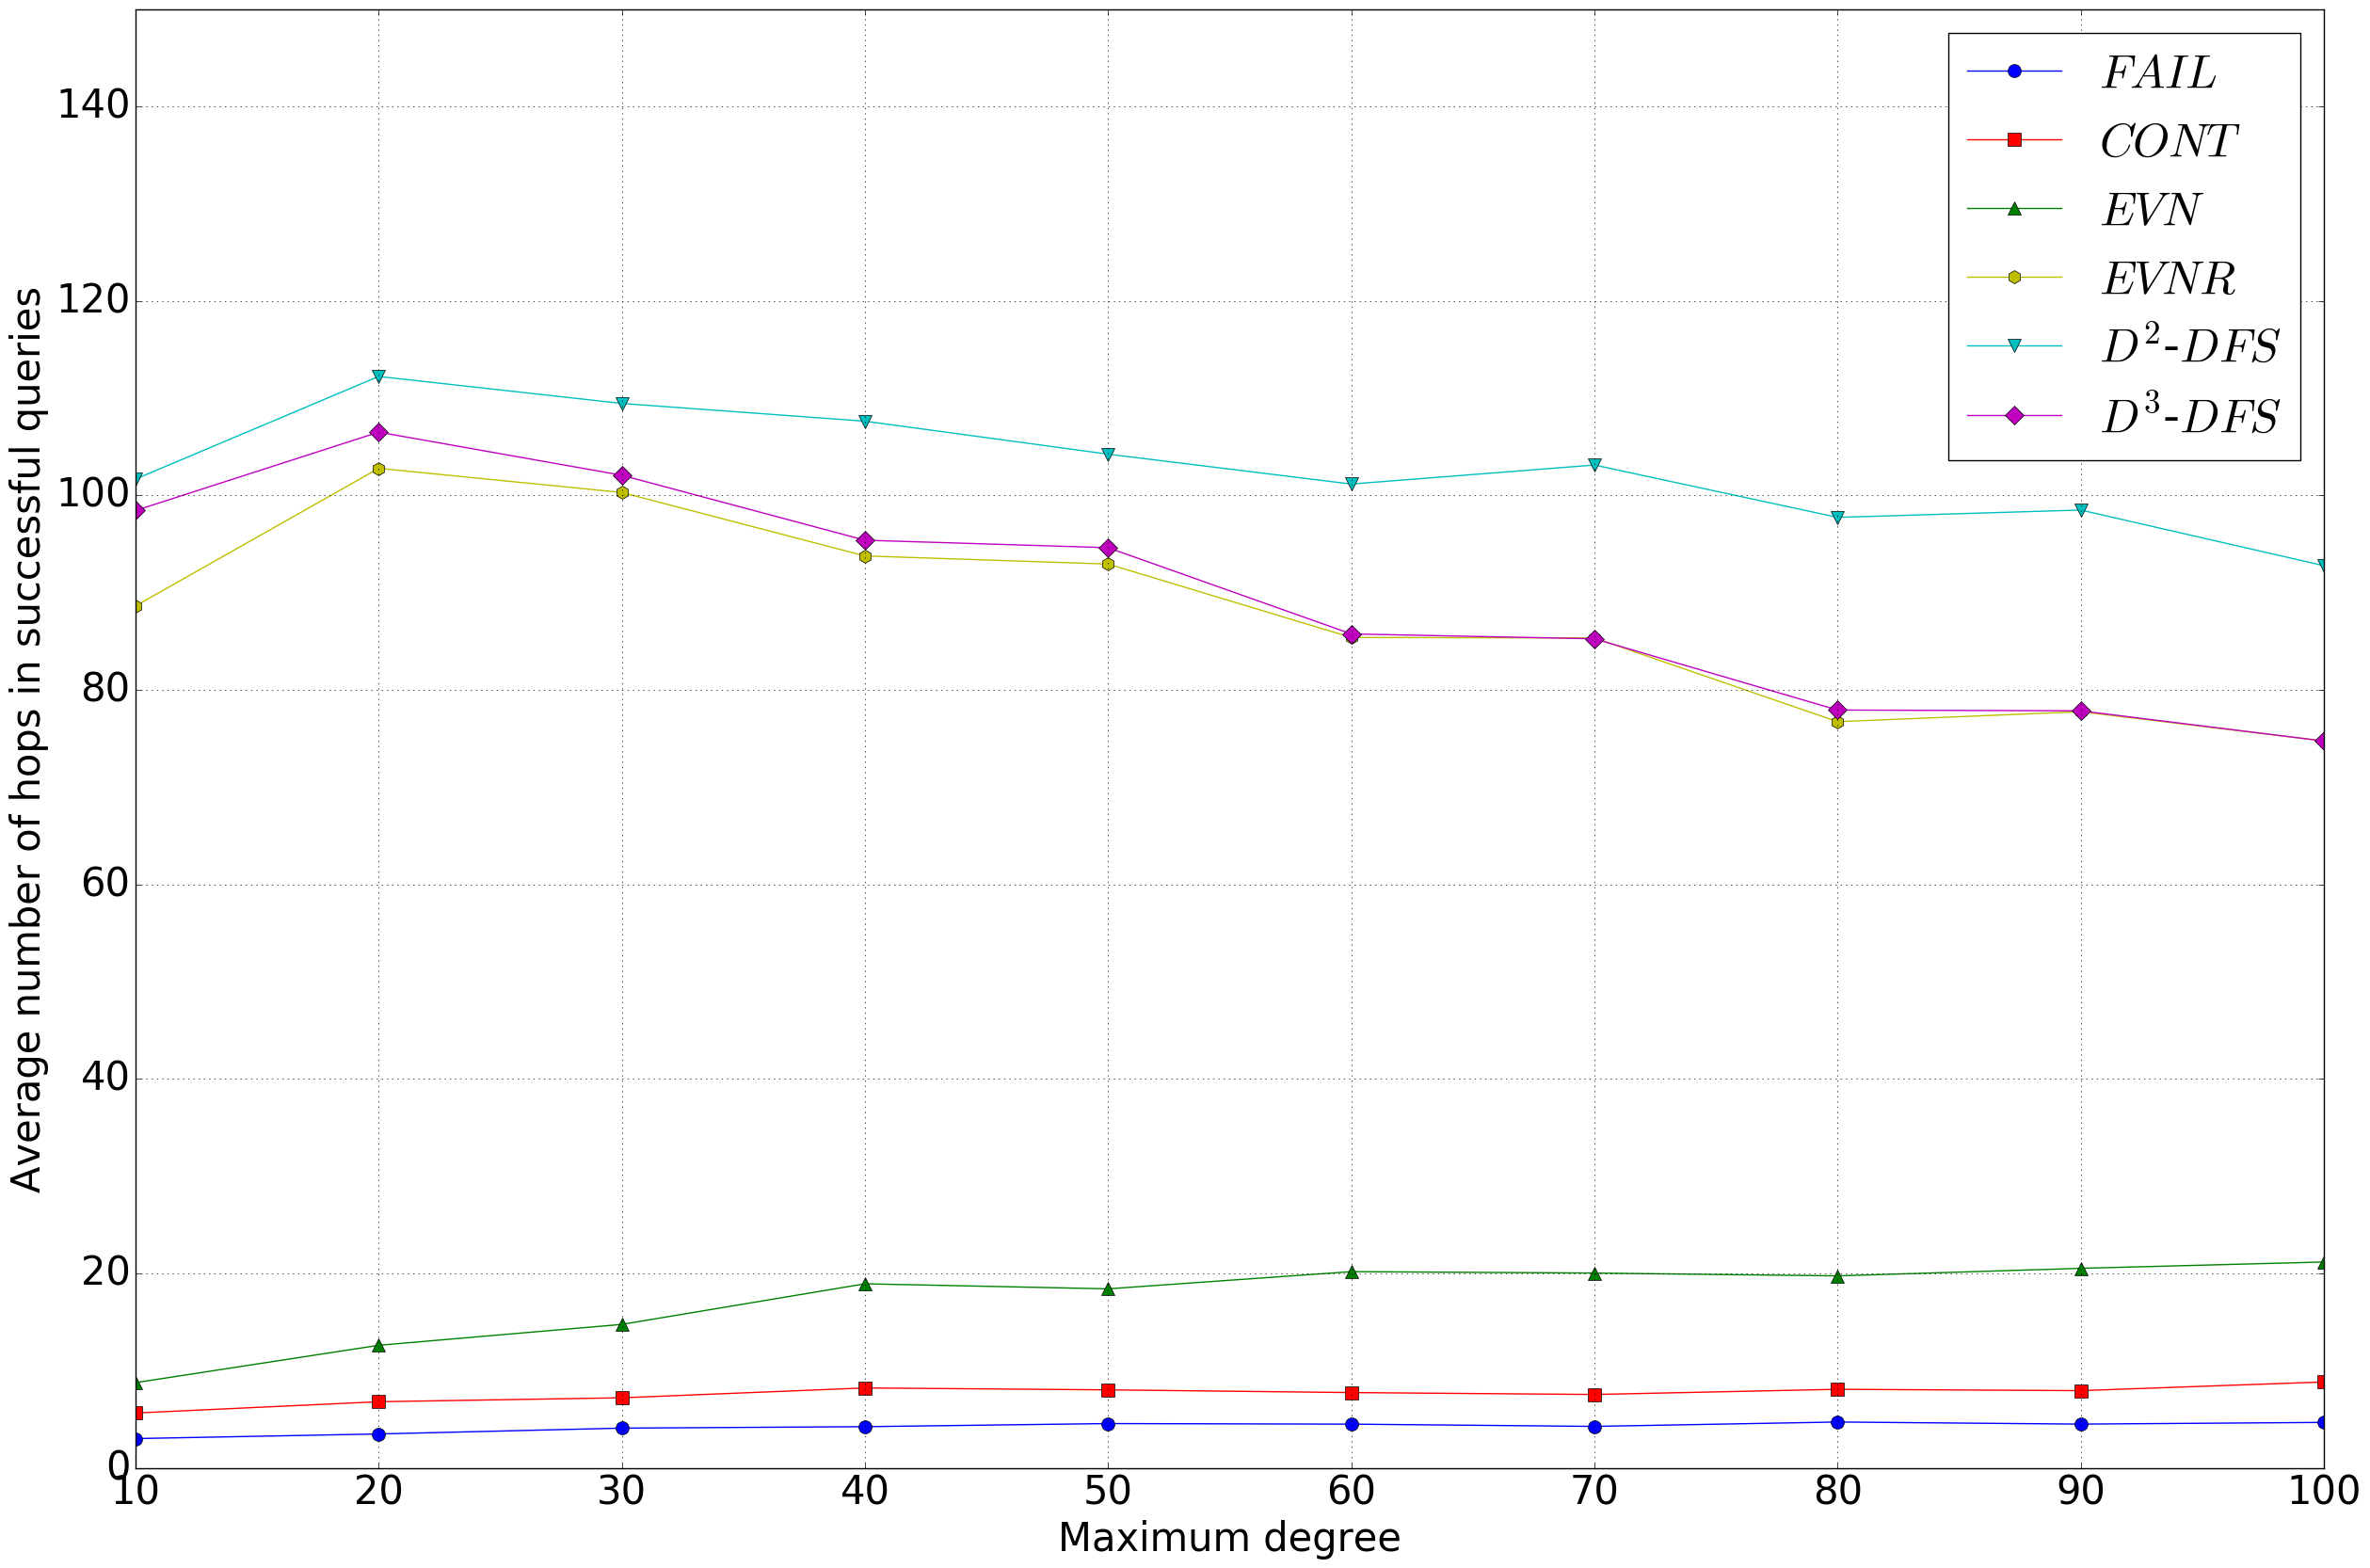

In [87]:
plt.plot(fail['clip'][:-1], fail['apl'][:-1], 'bo-', label='$FAIL$')
plt.plot(cont['clip'][:-1], cont['apl'][:-1], 'rs-', label='$CONT$')
plt.plot(evn['clip'][:-1], evn['apl'][:-1], 'g^-', label='$EVN$')
plt.plot(evnr['clip'][:-1], evnr['apl'][:-1], 'yh-', label='$EVNR$')
plt.plot(d2dfs['clip'][:-1], d2dfs['apl'][:-1], 'cv-', label='$D^2$-$DFS$')
plt.plot(d3dfs['clip'][:-1], d3dfs['apl'][:-1], 'mD-', label='$D^3$-$DFS$')
plt.grid(True)
plt.plot()
plt.xlabel("Maximum degree")
plt.ylabel("Average number of hops in successful queries")
plt.ylim(0, 150)
plt.legend(loc='upper right')
plt.savefig("fig/clip_hops.eps")
plt.show()

## 2.3 Cumulative success rates per number of hops

### 2.3.1 Maximum degree = 100

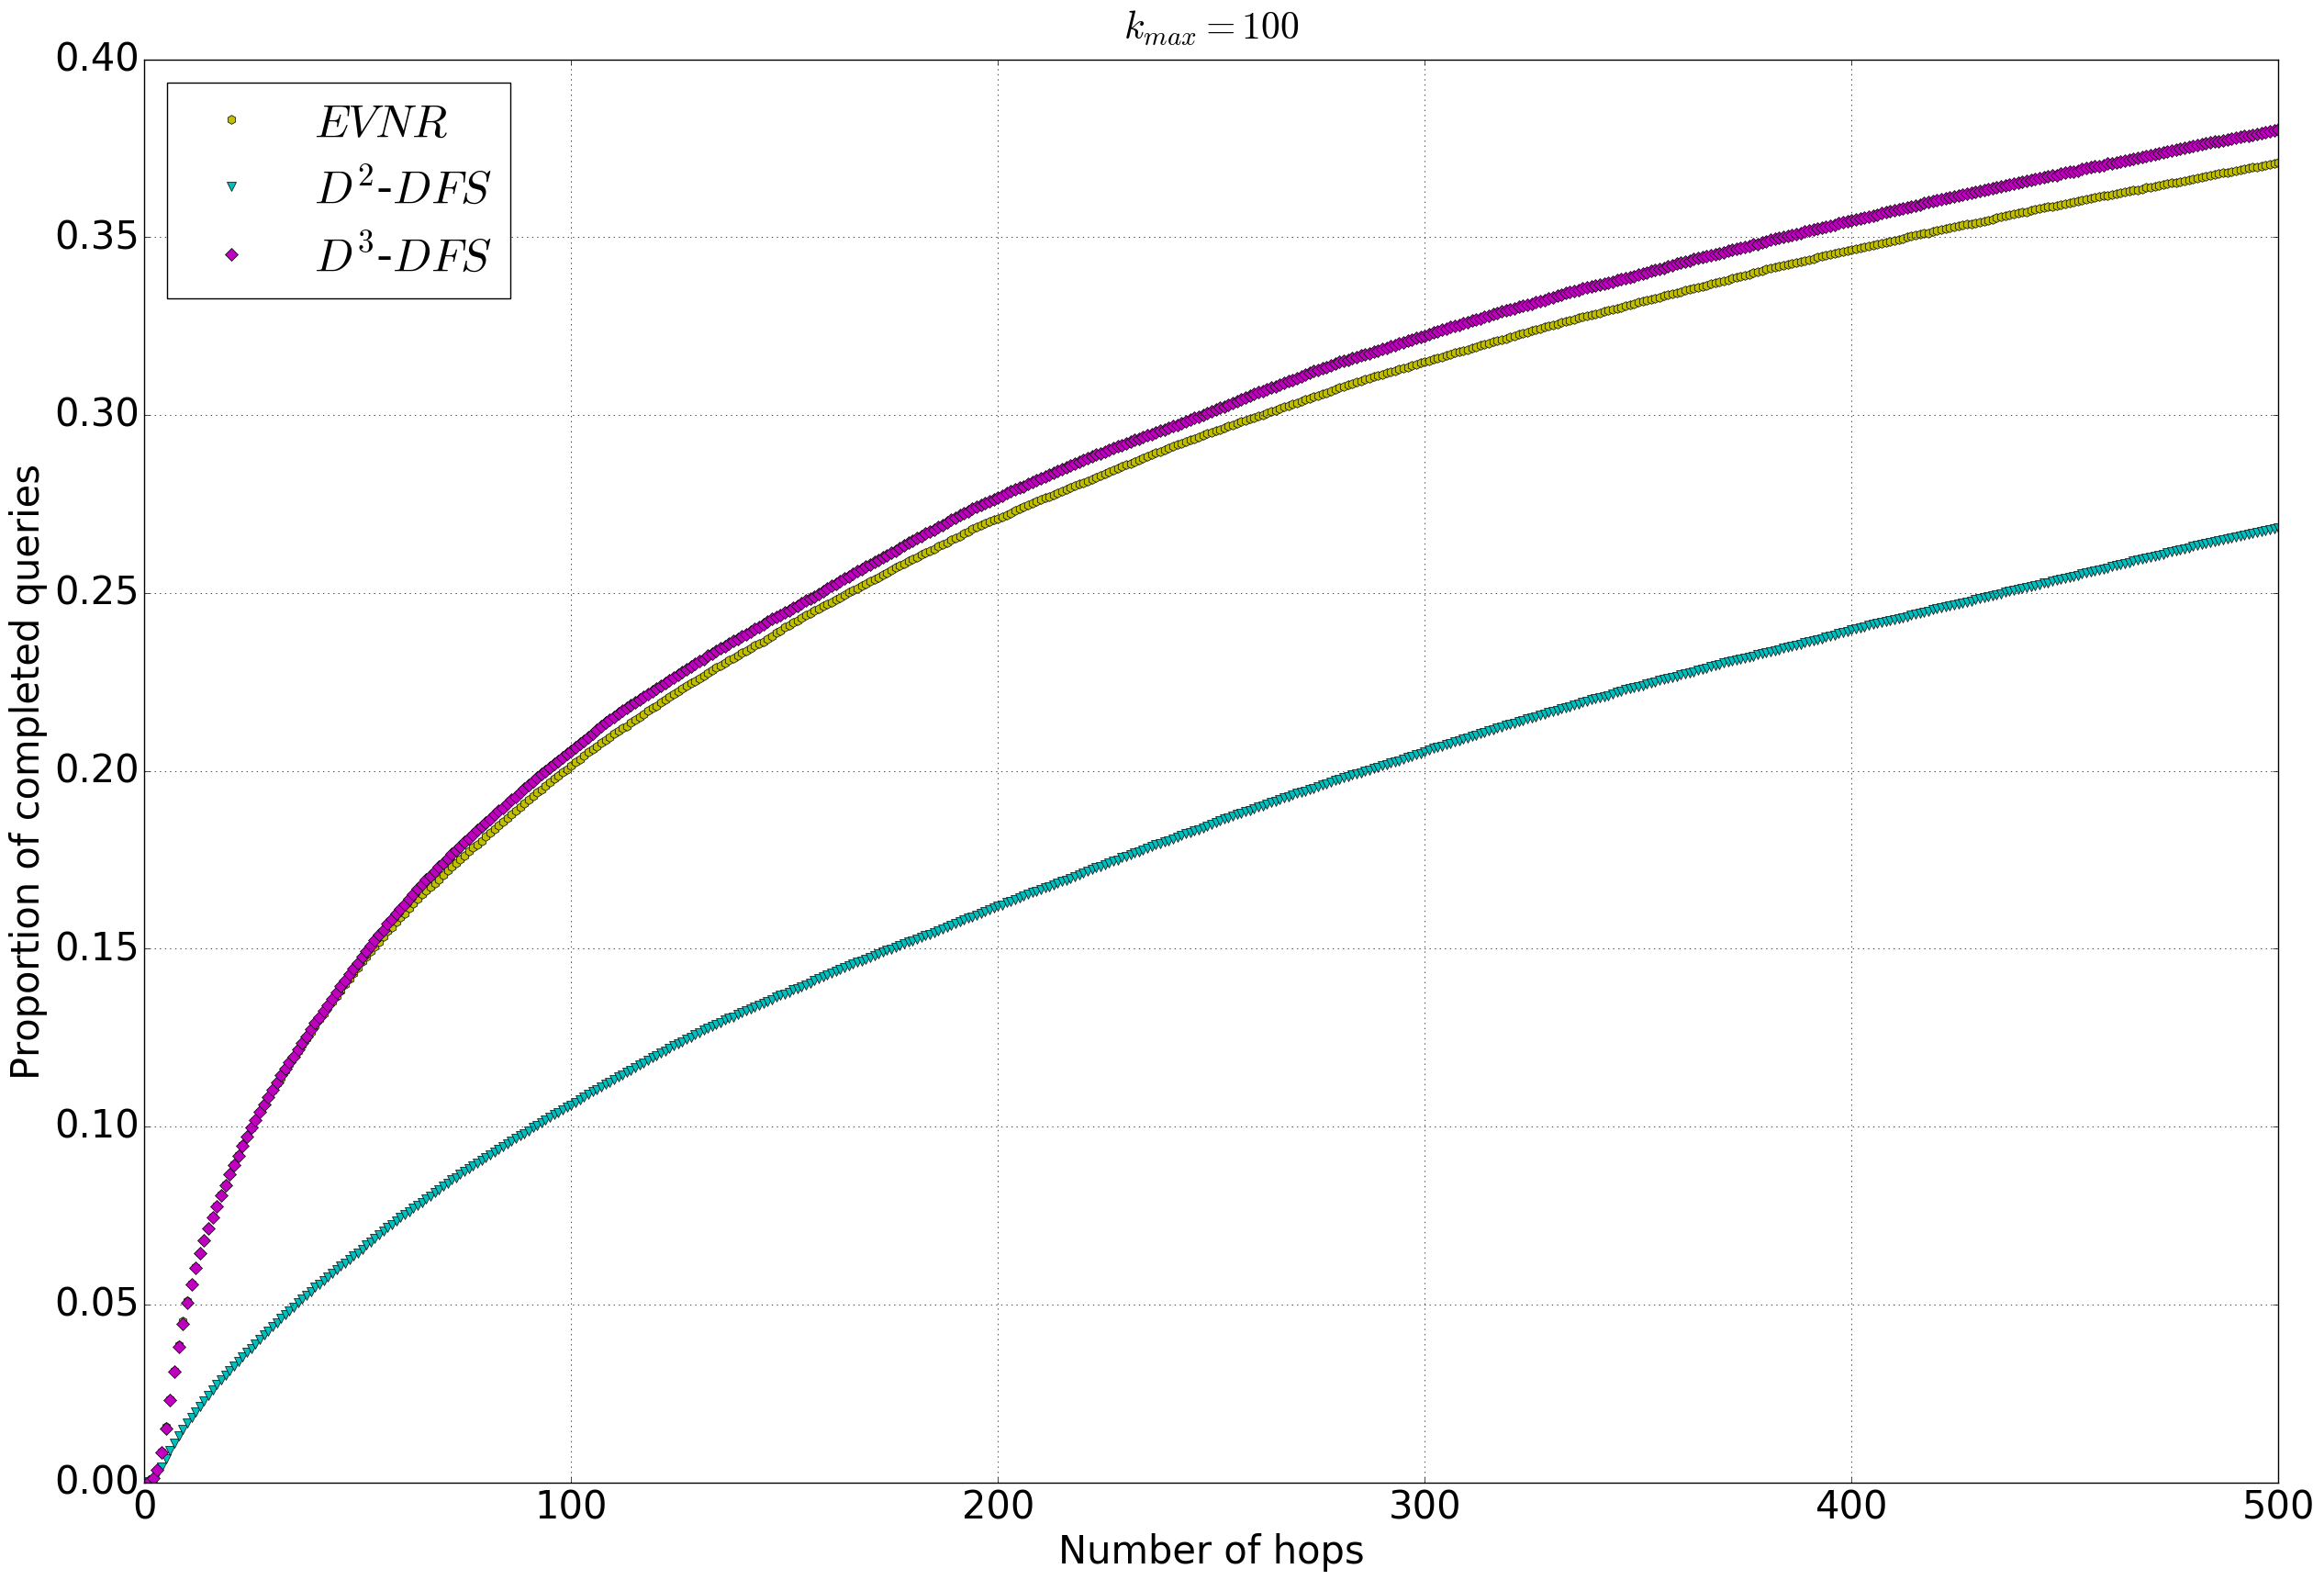

In [104]:
maxdeg = 100
evnr_hist = np.sort(np.genfromtxt("data/stats/EVNR_hist_100clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
d2dfs_hist = np.sort(np.genfromtxt("data/stats/D2DFS_hist_100clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
d3dfs_hist = np.sort(np.genfromtxt("data/stats/D3DFS_hist_100clip.csv", delimiter=',',
                    dtype=[('hop','i8'),
                           ('succ', 'f8')]),
              order='hop')
histlist = [evnr_hist, d2dfs_hist, d3dfs_hist]
for h in histlist:
    pre = 0
    for i, succ in enumerate(h['succ']):
        h['succ'][i] = pre = pre + h['succ'][i]
plt.plot(evnr_hist['hop'], evnr_hist['succ'], 'yh', label='$EVNR$', markersize=7)
plt.plot(d2dfs_hist['hop'], d2dfs_hist['succ'], 'cv', label='$D^2$-$DFS$', markersize=7)
plt.plot(d3dfs_hist['hop'], d3dfs_hist['succ'], 'mD', label='$D^3$-$DFS$', markersize=7)
plt.grid(True)
plt.plot()
plt.title("$k_{max}=%d$" % maxdeg, y=1.01)
plt.xlabel("Number of hops")
plt.ylabel("Proportion of completed queries")
plt.ylim(0,0.4)
plt.legend(loc='upper left')
plt.savefig("fig/cml_%dclip.eps" % maxdeg)
plt.show()

# 3. Simulation results in WoT graph with bounded minimum degree

In [89]:
fail = np.sort(np.genfromtxt("data/stats/FAIL_kcore.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('core', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='core')
fail = fail[:-3]
cont = np.sort(np.genfromtxt("data/stats/CONT_kcore.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('core', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='core')
cont = cont[:-3]
evn = np.sort(np.genfromtxt("data/stats/EVN_kcore.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('core', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='core')
evn = evn[:-3]

d2dfs = np.sort(np.genfromtxt("data/stats/D2DFS_kcore.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('core', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='core')
d2dfs = d2dfs[:-3]
d3dfs = np.sort(np.genfromtxt("data/stats/D3DFS_kcore.csv", delimiter=',',
                    dtype=[('size','i8'),
                           ('core', 'i8'),
                           ('succ', 'f8'),
                           ('apl', 'f8')]),
              order='core')
d3dfs = d3dfs[:-3]

## 3.1 Success rate by core

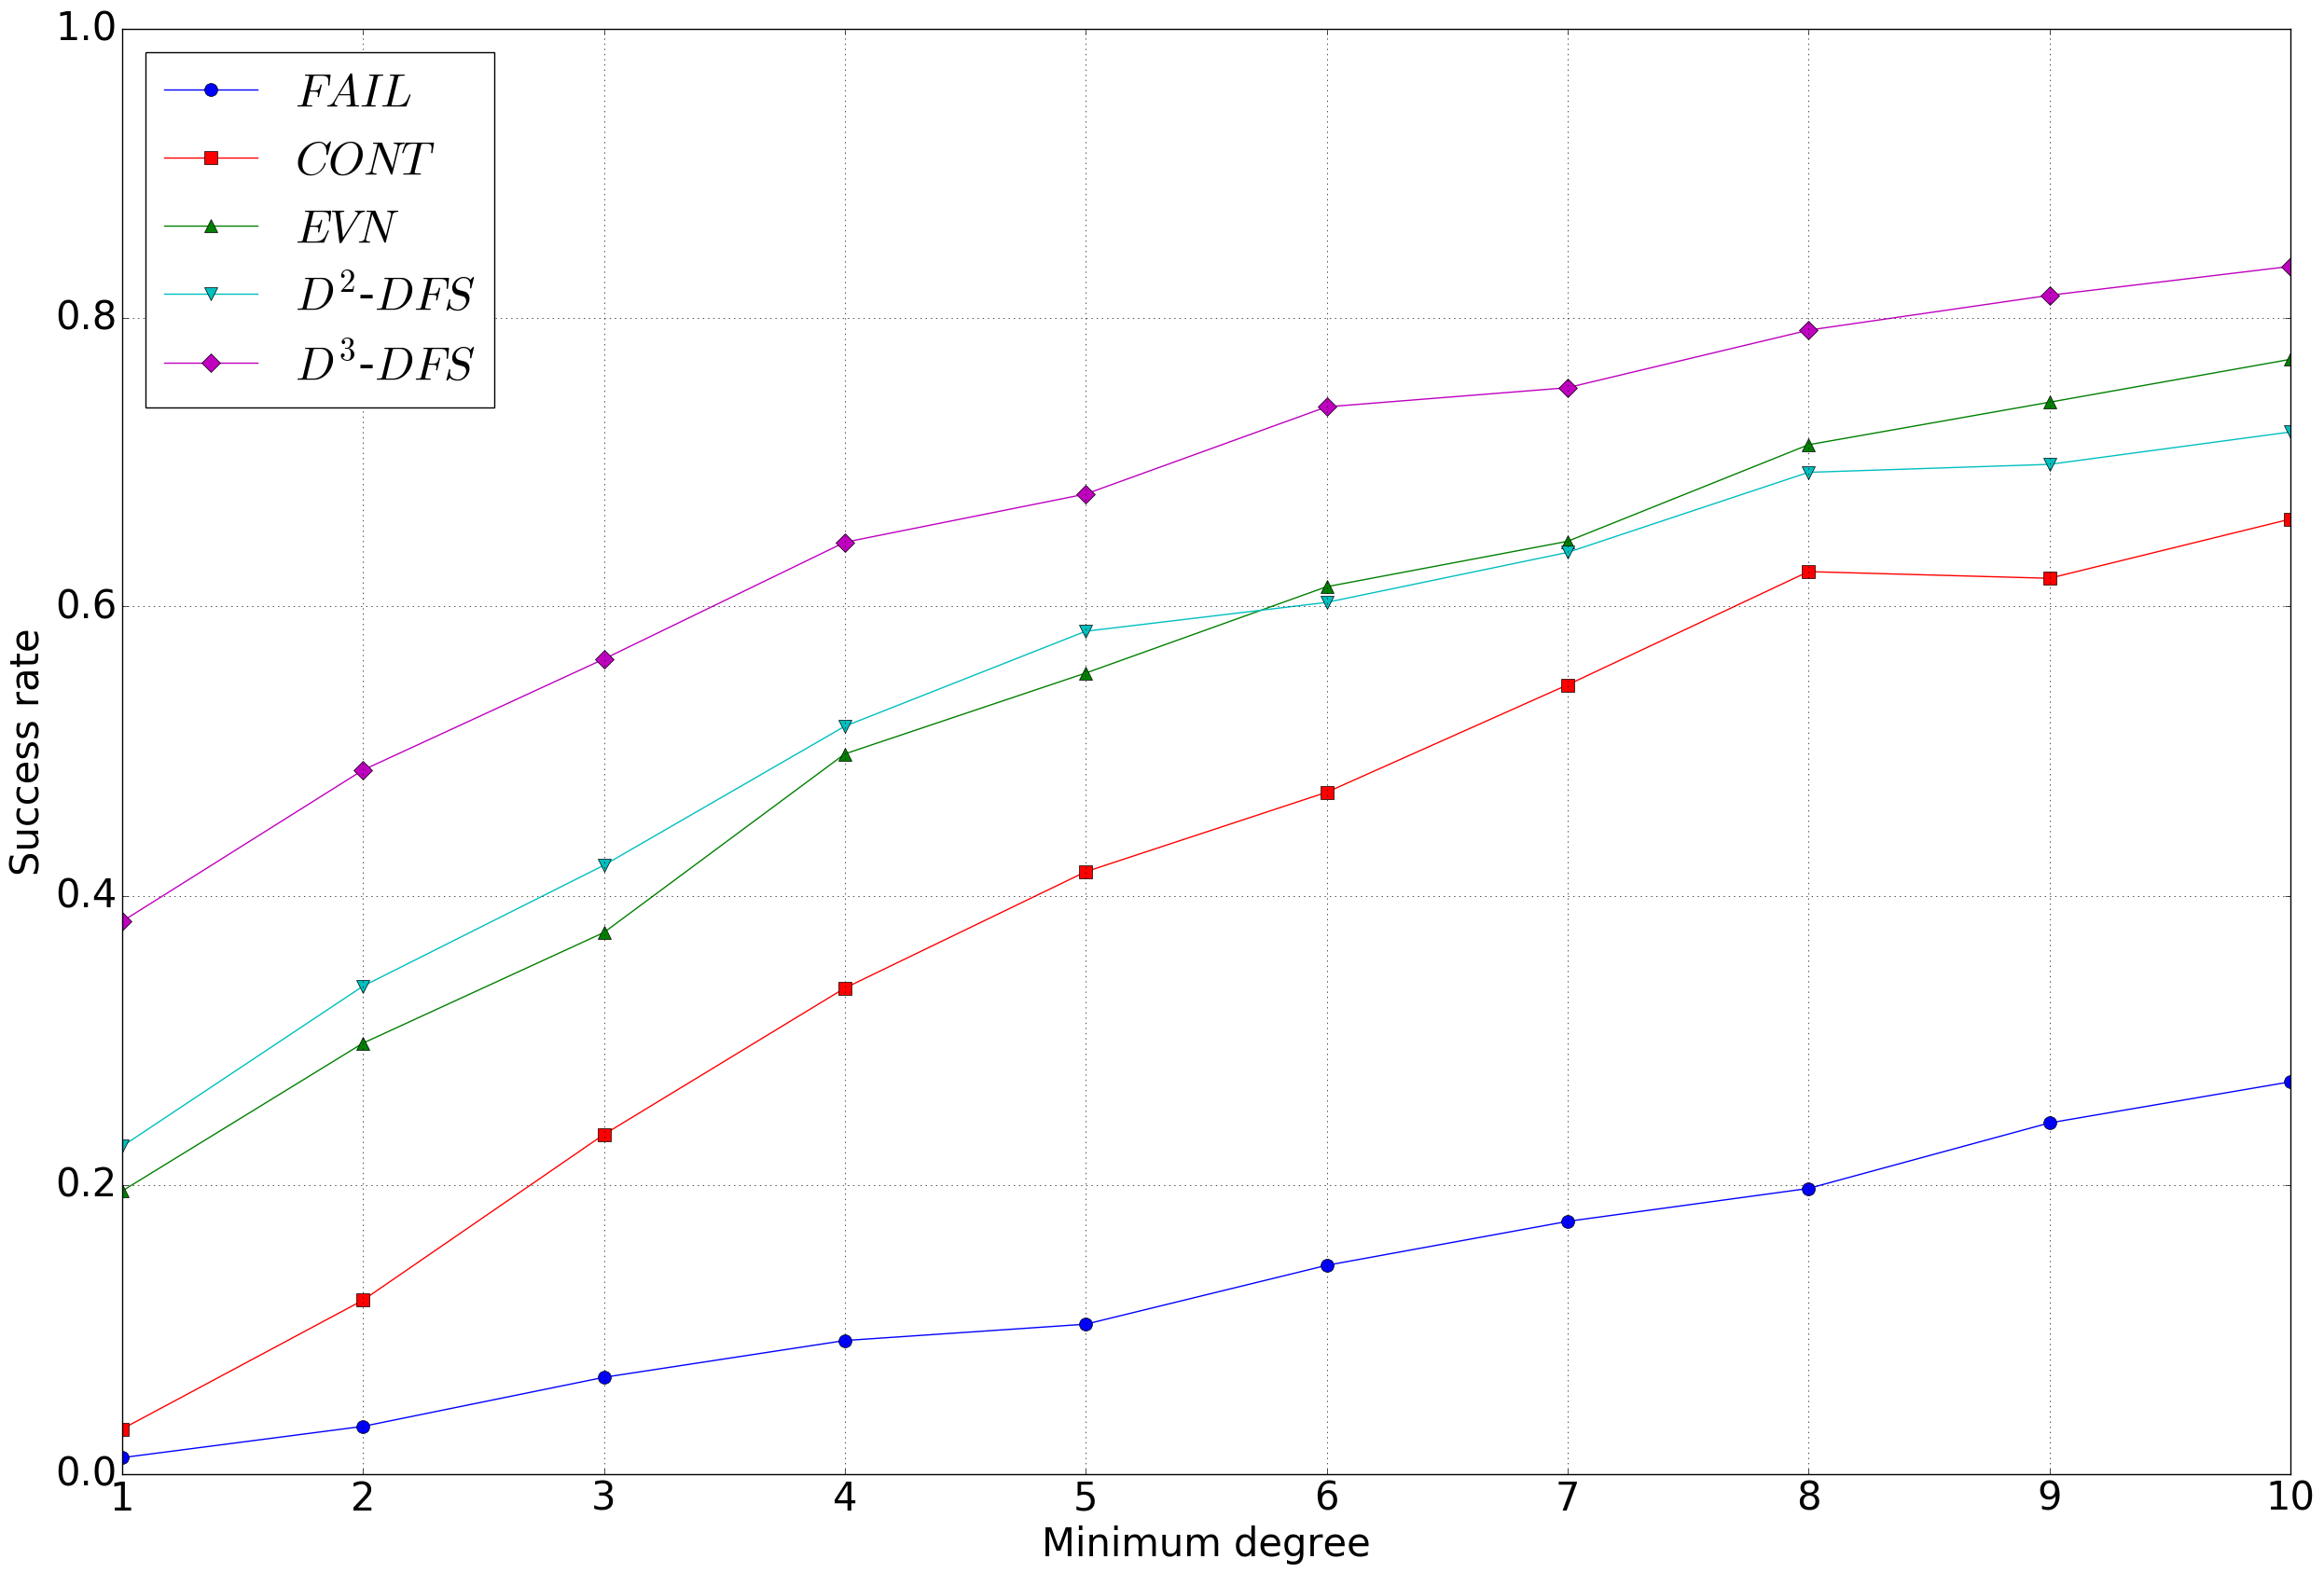

In [92]:
plt.plot(fail['core'], fail['succ'], 'bo-', label='$FAIL$')
plt.plot(cont['core'], cont['succ'], 'rs-', label='$CONT$')
plt.plot(evn['core'], evn['succ'], 'g^-', label='$EVN$')
plt.plot(d2dfs['core'], d2dfs['succ'], 'cv-', label='$D^2$-$DFS$')
plt.plot(d3dfs['core'], d3dfs['succ'], 'mD-', label='$D^3$-$DFS$')
plt.grid(True)
plt.plot()
#plt.title("Success rates of routing algorithms")
plt.xlabel("Minimum degree")
plt.ylabel("Success rate")
plt.ylim(0,1)
plt.legend(loc='upper left')
#plt.savefig("fig/core_succ.eps")
plt.show()

## 3.2 Average number of hops by core

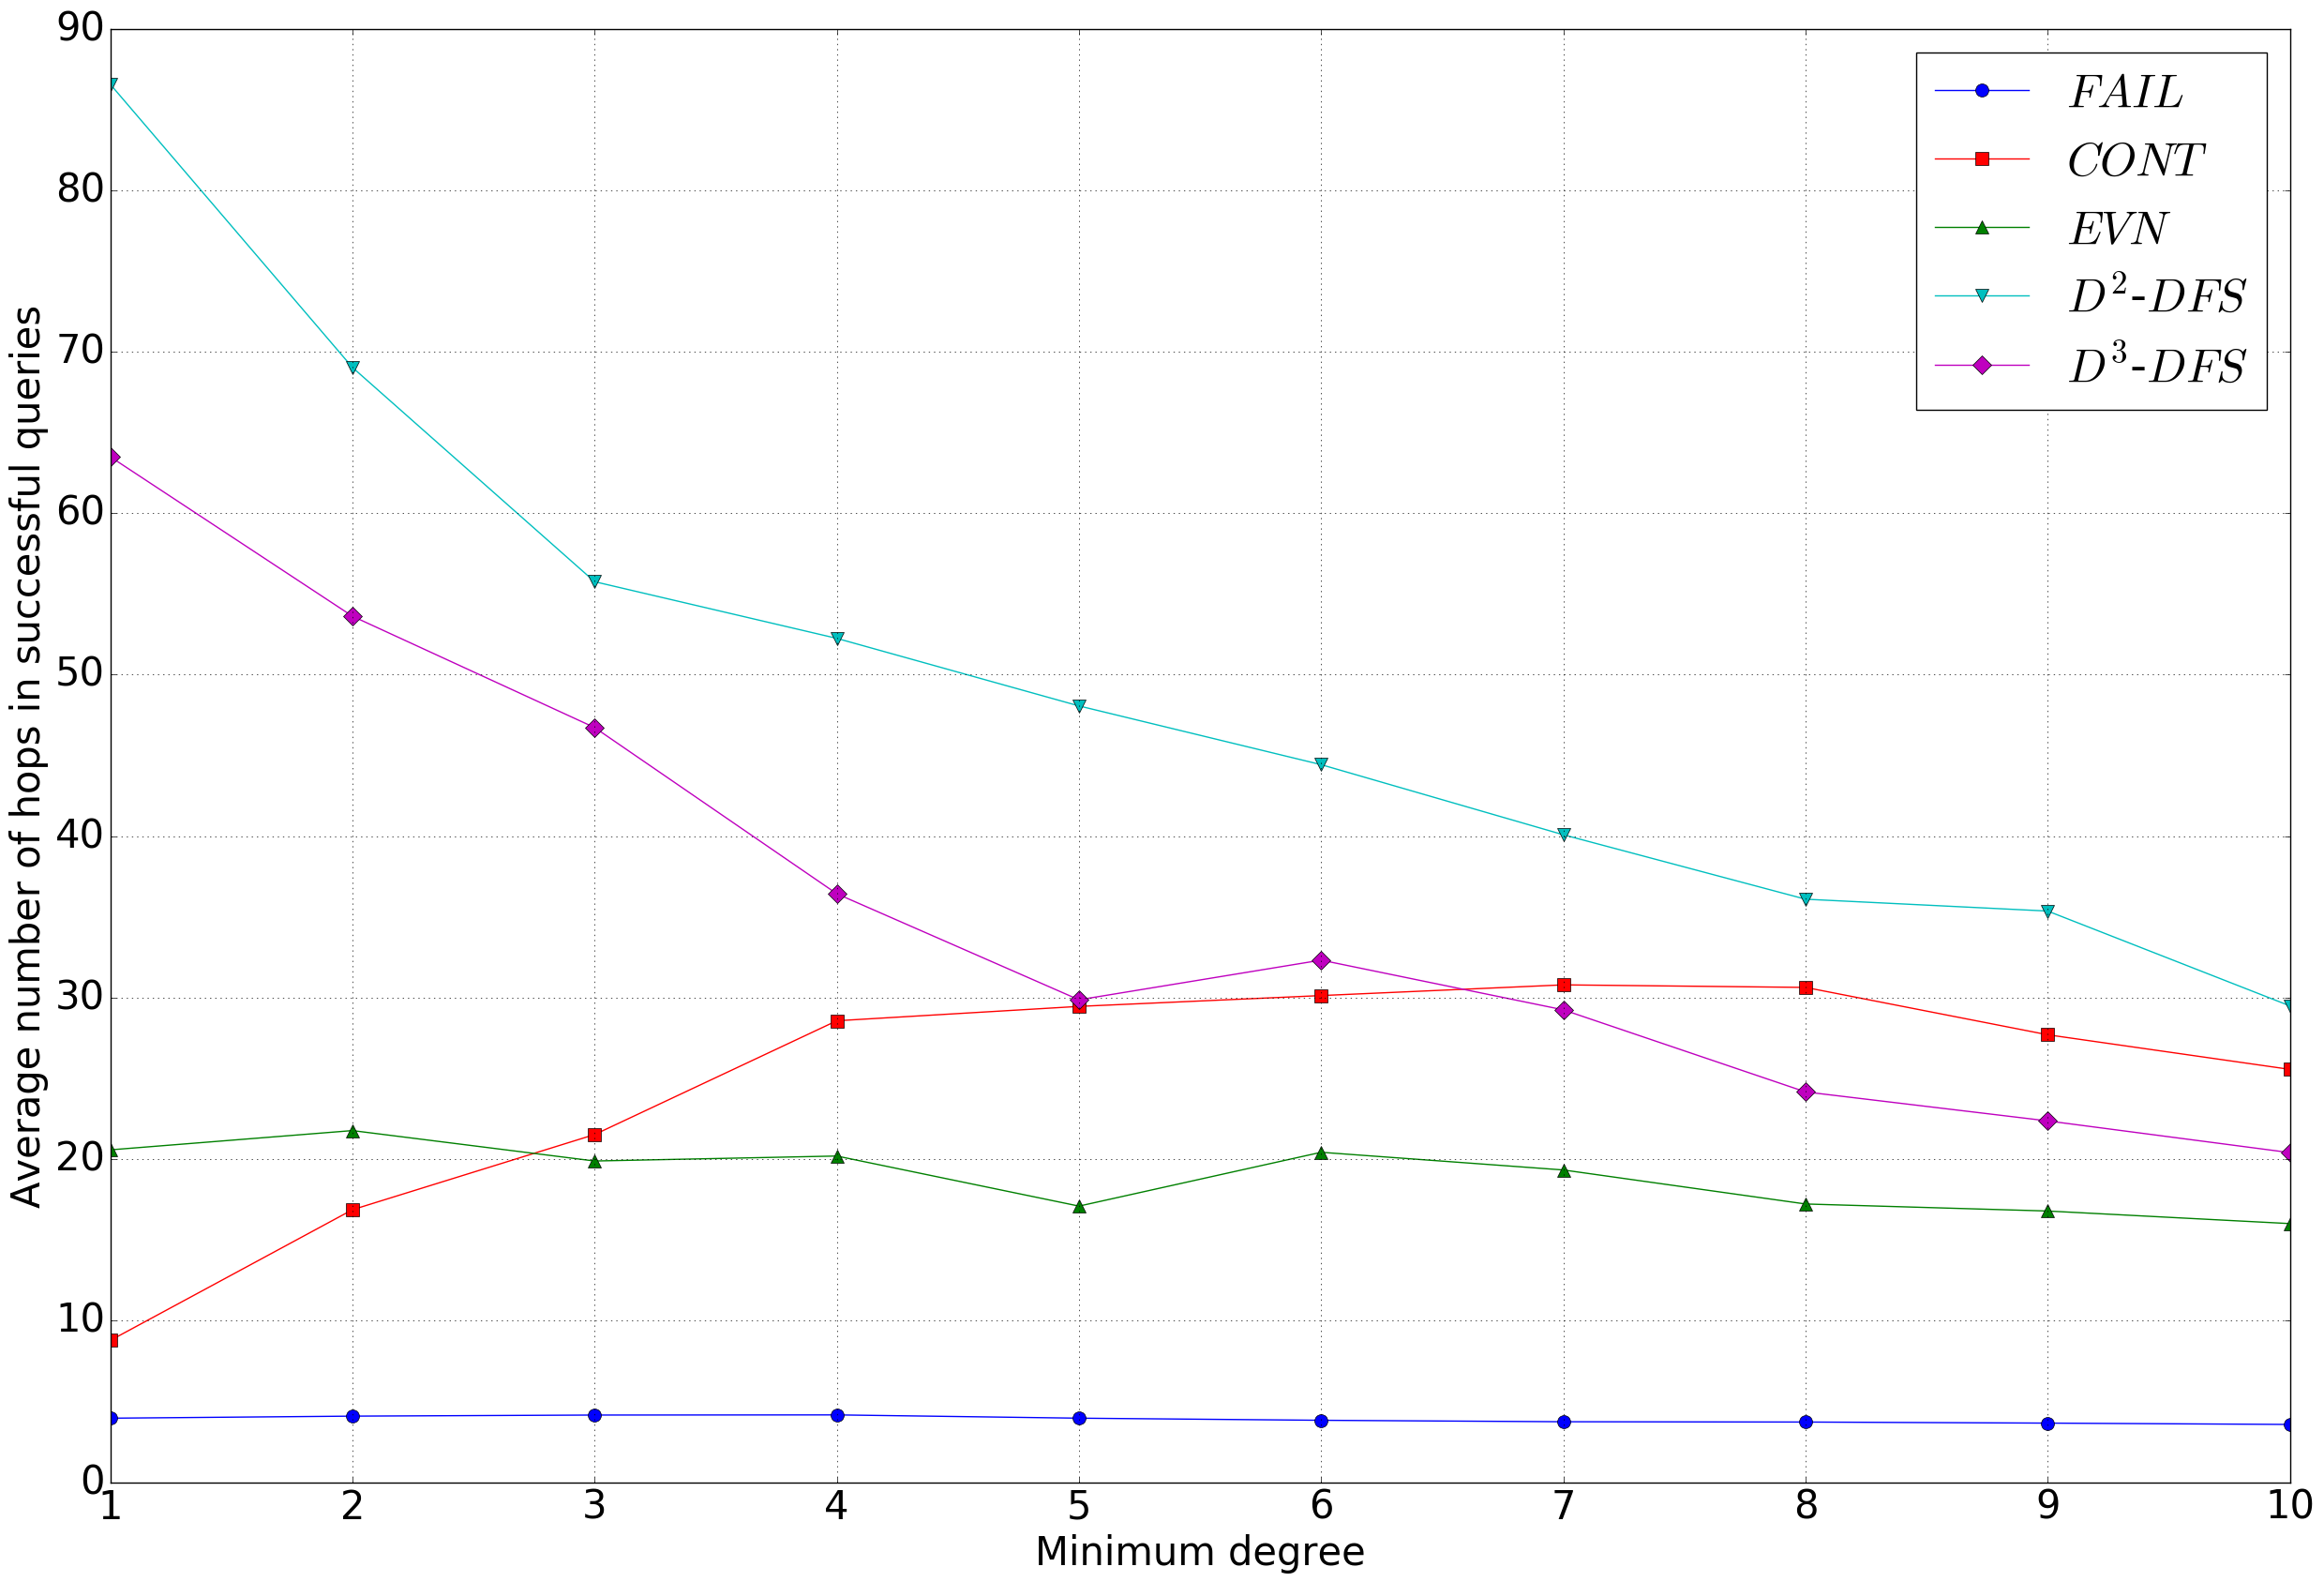

In [93]:
plt.plot(fail['core'], fail['apl'], 'bo-', label='$FAIL$')
plt.plot(cont['core'], cont['apl'], 'rs-', label='$CONT$')
plt.plot(evn['core'], evn['apl'], 'g^-', label='$EVN$')
plt.plot(d2dfs['core'], d2dfs['apl'], 'cv-', label='$D^2$-$DFS$')
plt.plot(d3dfs['core'], d3dfs['apl'], 'mD-', label='$D^3$-$DFS$')
plt.grid(True)
plt.plot()
plt.xlabel("Minimum degree")
plt.ylabel("Average number of hops in successful queries")
plt.legend()
#plt.savefig("fig/core_hops.eps")
plt.show()